In [1]:
import numpy as np
import pandas as pd

from fractions import Fraction
from math import gcd
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

from shor import ShorAlgorithm

In [2]:
shor = ShorAlgorithm()

In [29]:
number = 81

Numbers that won't produce nontrivial factor with `gcd()`.

In [30]:
gcd_results = [(i,gcd(i,number)) for i in range(2,number)]
list_of_numbers = [tp[0] for tp in gcd_results if tp[1] == 1]
print(list_of_numbers)

[2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35, 37, 38, 40, 41, 43, 44, 46, 47, 49, 50, 52, 53, 55, 56, 58, 59, 61, 62, 64, 65, 67, 68, 70, 71, 73, 74, 76, 77, 79, 80]


In [31]:
a = 7
num_qubits_qft = 6
shots = 8192

In [32]:
qc = shor.quantum_circuit(number=number, a=a, num_qubits_qft=num_qubits_qft)

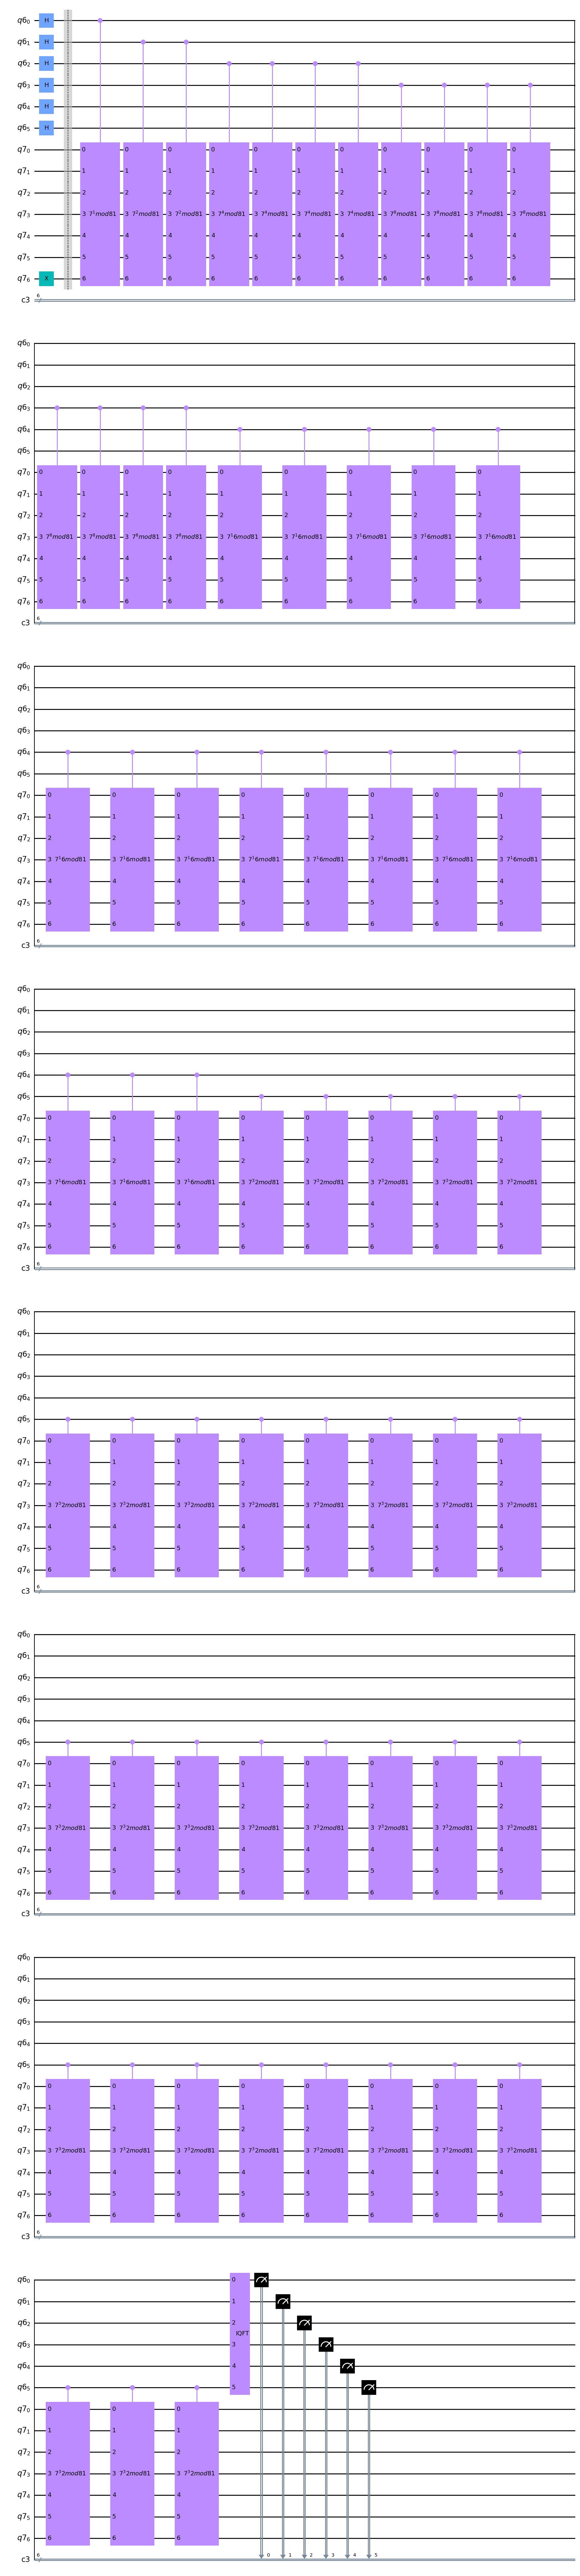

In [33]:
qc.draw(output="mpl", style="clifford")

In [34]:
guesses_list = []
rows = []
columns = ["register_output", "phase", "fraction", "guess_for_r"]

simulator = AerSimulator(method="statevector", device="CPU")
qc = qc.decompose().decompose()
counts = simulator.run(circuits=qc, shots=shots).result().get_counts()

keys_list = list(counts.keys())
num_qubits = len(keys_list[0])

for output in counts:
    decimal = int(output, 2)
    phase = decimal / (2**num_qubits)
    frac = Fraction(phase).limit_denominator(15)
    rows.append(
        [
            f"{output}(bin) = {decimal:>3}(dec)",
            phase,
            f"{frac.numerator}/{frac.denominator}",
            frac.denominator,
        ]
    )

df = pd.DataFrame(rows, columns=columns)

for phase, r in zip(df.phase.values, df.guess_for_r.values):
    if not np.isclose(0.0, phase):
        if r % 2 == 0:
            guesses = [
                gcd(a ** (r // 2) - 1, number),
                gcd(a ** (r // 2) + 1, number),
            ]
            for guess in guesses:
                if guess not in [1, number] and (number % guess) == 0:
                    guesses_list.append(guess)

guesses_set = set(guesses_list)
if len(guesses_set) == 1:
    factor = list(guesses_set)[0]
    guesses_tuple = (factor, int(number / factor))
else:
    guesses_tuple = tuple(guesses_set)

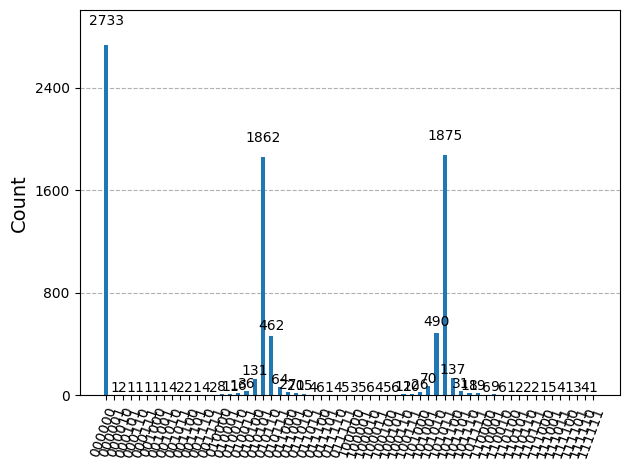

In [35]:
plot_histogram(counts)

In [36]:
df

,register_output,phase,fraction,guess_for_r
0,001001(bin) = 9(dec),0.140625,1/7,7
1,001111(bin) = 15(dec),0.234375,3/13,13
2,101010(bin) = 42(dec),0.656250,2/3,3
3,101100(bin) = 44(dec),0.687500,9/13,13
4,101101(bin) = 45(dec),0.703125,7/10,10
5,010000(bin) = 16(dec),0.250000,1/4,4
6,101110(bin) = 46(dec),0.718750,5/7,7
7,001110(bin) = 14(dec),0.218750,2/9,9
8,010100(bin) = 20(dec),0.312500,4/13,13
9,010111(bin) = 23(dec),0.359375,5/14,14


In [37]:
guesses_set

{3, 9}

In [38]:
guesses_tuple

(9, 3)